This is a rough work notebook with chunks of random analyses that are properly documented in other notebooks.

In [1]:
import sys
import os # my addtion

import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
import cebra.data
import torch
import cebra.integrations
import cebra.datasets
from cebra import CEBRA
import torch
import pickle
import utils
import seaborn as sns

from matplotlib.collections import LineCollection
import pandas as pd

## QUICK SESSION STATS ANALYSIS

In [11]:
df_all_choice = pickle.load(open("/Users/brian.gitahi/Desktop/AIND/CEBRA/Git/CEBRA-Demo/all_session_stats_choice.pkl", "rb"))

In [12]:
df_all_choice

,subject_ID,ses_idx,all4_AUC_choice,DA_AUC_choice,NE_AUC_choice,5HT_AUC_choice,ACh_AUC_choice,b4_AUC_choice,af_AUC_choice,ses_idx_count
0,634704,634704_2022-08-31,0.998162,0.953547,0.975854,0.975771,0.940264,0.975688,0.988971,1
1,632110,632110_2022-08-10,1.000000,0.921269,0.961124,0.869761,0.953878,0.964747,0.954759,1
2,632106,632106_2022-10-28,0.500000,0.795429,0.908646,0.889115,0.807967,0.953383,0.917931,1
3,634704,634704_2022-09-01,0.995392,0.926250,0.974654,0.500000,0.959252,0.930858,0.983853,2
4,632110,632110_2022-08-11,0.991597,0.933757,0.917934,0.882247,0.978938,0.960004,0.976864,2
...,...,...,...,...,...,...,...,...,...,...
206,632106,632106_2022-10-20,0.952741,0.500000,0.721097,0.656238,0.732648,0.847366,0.874548,12
207,632106,632106_2022-10-24,0.983246,0.846930,0.914934,0.500000,0.843591,0.848845,0.923093,13
208,632106,632106_2022-10-25,0.975169,0.718124,0.866027,0.828422,0.500000,0.861373,0.578131,14
209,632106,632106_2022-10-21,0.945950,0.500000,0.763561,0.828547,0.816209,0.879587,0.907429,15


In [4]:
df_

,subject_ID,ses_idx,all4_AUC,DA_AUC,NE_AUC,5HT_AUC,ACh_AUC,b4_AUC,af_AUC
0,632104,632104_2022-10-25,0.996815,0.922527,0.953301,0.854607,0.91949,0.913121,0.967707


In [6]:
df_sessions_80 = pickle.load(open('/Users/brian.gitahi/Desktop/AIND/CEBRA/Git/CEBRA-Demo/session_stats(reward)_80 (1).pkl', "rb"))

In [7]:
df_sessions_80

,subject_ID,ses_idx,all4_AUC,DA_AUC,NE_AUC,5HT_AUC,ACh_AUC,b4_AUC,af_AUC
0,631198,631198_2022-07-13,0.992727,0.759421,0.816942,0.838430,0.768595,0.842562,0.968926
1,631198,631198_2022-07-14,0.991778,0.788603,0.794987,0.773563,0.785461,0.849733,0.959325
2,631198,631198_2022-07-20,0.990672,0.743498,0.771769,0.753264,0.795094,0.811270,0.948554
3,631198,631198_2022-07-21,0.992595,0.723025,0.786630,0.695264,0.776138,0.814966,0.958085
4,631198,631198_2022-07-22,0.995347,0.796495,0.800553,0.704502,0.718461,0.825915,0.966536
5,631198,631198_2022-07-25,0.987023,0.815432,0.834051,0.770407,0.772700,0.877176,0.957660
6,631199,631199_2022-07-12,0.988549,0.905646,0.977608,0.858469,0.874195,0.984274,0.988549
7,631199,631199_2022-07-13,0.988235,0.954232,0.978889,0.924902,0.955359,0.957778,0.988235
8,631199,631199_2022-07-15,0.992683,0.940949,0.950182,0.882245,0.876320,0.798981,0.990767
9,631199,631199_2022-07-18,0.990927,0.984234,0.969820,0.938160,0.778764,0.898005,0.988996


In [7]:
def plotAUC_ind_nms(df, title='Mean AUC scores across 81 sessions of Embeddings of Individual NMs'):

    all_auc_mean = df.loc[:,'all4_AUC'].mean()
    ind_nms_mean_auc = np.array(df.loc[:,['DA_AUC', 'NE_AUC', '5HT_AUC', 'ACh_AUC']].mean())

    b4_auc_mean = df.loc[:,'b4_AUC'].mean()
    af_auc_mean = df.loc[:,'af_AUC'].mean()

    sns.stripplot(data=df.loc[:,['DA_AUC', 'NE_AUC', '5HT_AUC', 'ACh_AUC']])
    plt.plot(ind_nms_mean_auc, 'ko', label='individual mean auc score')
    plt.xlabel('Neuromodulator')
    plt.axhline(np.round(all_auc_mean,2), linestyle='--', c='k',label='combined dataset mean (All 4)')
    plt.ylabel('AUC Score')
    plt.title(title)
    plt.legend()
    plt.show()
    # %%

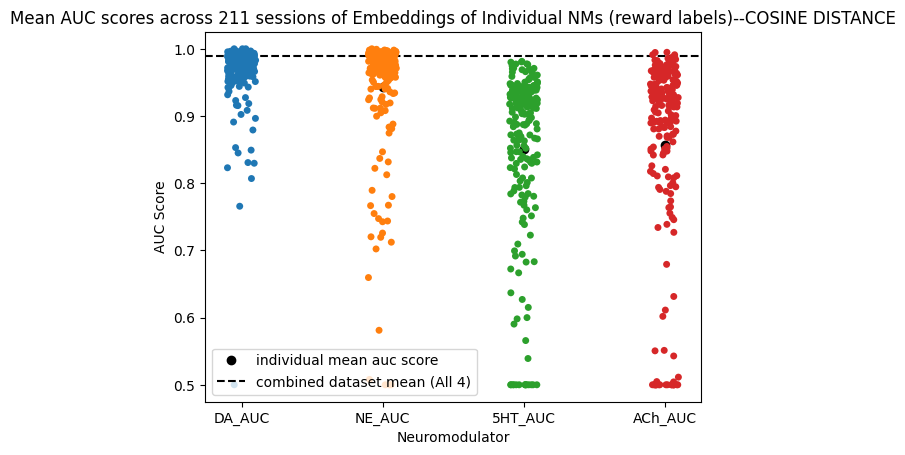

In [8]:
plotAUC_ind_nms(df_cos_sessions, title="Mean AUC scores across 211 sessions of Embeddings of Individual NMs (reward labels)--COSINE DISTANCE")

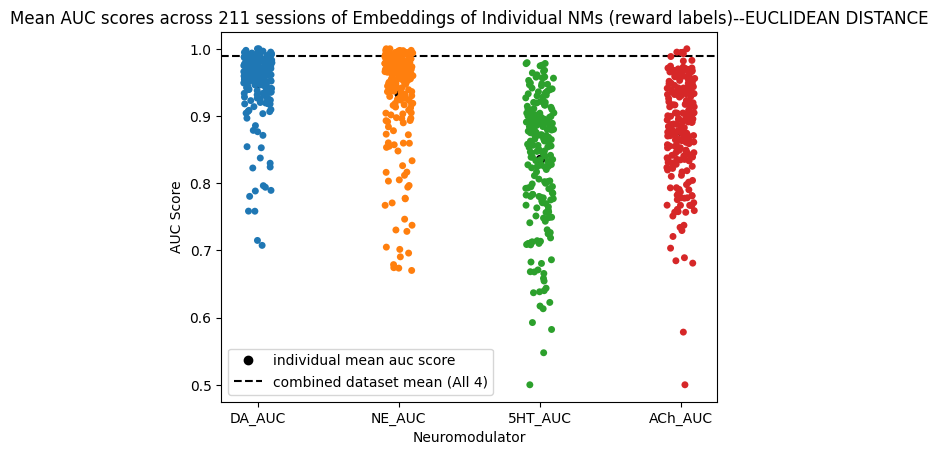

In [13]:
plotAUC_ind_nms(df_all_sessions_parallel, "Mean AUC scores across 211 sessions of Embeddings of Individual NMs (reward labels)--EUCLIDEAN DISTANCE")

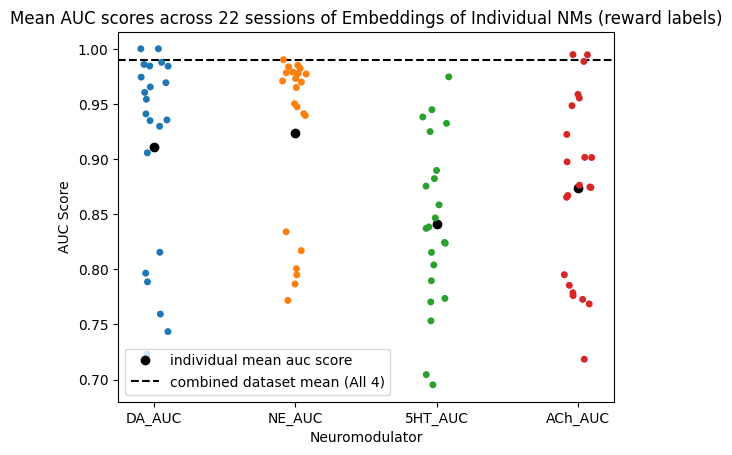

In [9]:
plotAUC_ind_nms(df_sessions_80, title="Mean AUC scores across 22 sessions of Embeddings of Individual NMs (reward labels)")

In [10]:
df_sessions_140.loc[:,'all4_AUC'].mean()

NameError: name 'df_sessions_140' is not defined

In [11]:
df_sessions_140 = pickle.load(open('/Users/brian.gitahi/Desktop/AIND/CEBRA/Git/CEBRA-Demo/session_stats_140.pkl', "rb"))

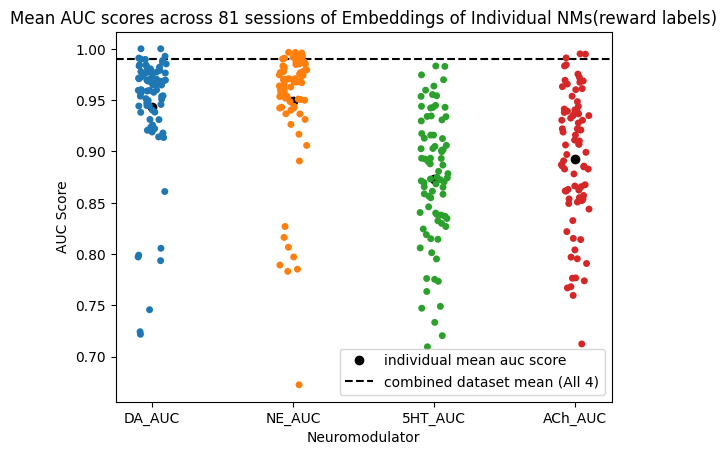

In [12]:
all_auc_mean = df_sessions_140.loc[:,'all4_AUC'].mean()
ind_nms_mean_auc = np.array(df_sessions_140.loc[:,['DA_AUC', 'NE_AUC', '5HT_AUC', 'ACh_AUC']].mean())

b4_auc_mean = df_sessions_140.loc[:,'b4_AUC'].mean()
af_auc_mean = df_sessions_140.loc[:,'af_AUC'].mean()


sns.stripplot(data=df_sessions_140.loc[:,['DA_AUC', 'NE_AUC', '5HT_AUC', 'ACh_AUC']])
plt.plot(ind_nms_mean_auc, 'ko', label='individual mean auc score')
plt.xlabel('Neuromodulator')
plt.axhline(np.round(all_auc_mean,2), linestyle='--', c='k',label='combined dataset mean (All 4)')
plt.ylabel('AUC Score')
plt.title('Mean AUC scores across 81 sessions of Embeddings of Individual NMs(reward labels)')
plt.legend()
plt.show()
# %%



In [3]:
df_sessions_300_c = pickle.load(open('/Users/brian.gitahi/Desktop/AIND/CEBRA/Git/CEBRA-Demo/session_stats(choice)_300.pkl', "rb"))

In [4]:
df_sessions_300_c

,subject_ID,ses_idx,all4_AUC,DA_AUC,NE_AUC,5HT_AUC,ACh_AUC,b4_AUC,af_AUC
0,631198,631198_2022-07-13,0.991573,0.779697,0.753223,0.893325,0.866146,0.916360,0.967204
1,631198,631198_2022-07-14,0.993397,0.846969,0.771522,0.944752,0.877843,0.920378,0.983689
2,631198,631198_2022-07-20,0.997826,0.790533,0.742155,0.910723,0.895267,0.924651,0.967558
3,631198,631198_2022-07-21,1.000000,0.875665,0.722354,0.918865,0.912093,0.890331,0.964311
4,631198,631198_2022-07-22,0.998507,0.878331,0.800645,0.956017,0.954356,0.901393,0.980909
...,...,...,...,...,...,...,...,...,...
206,641494,641494_2022-11-07,0.971653,0.774919,0.874490,0.648394,0.822126,0.854087,0.931071
207,641494,641494_2022-11-08,0.979035,0.790818,0.842770,0.742710,0.833222,0.859427,0.908506
208,641494,641494_2022-11-09,0.981727,0.853506,0.909513,0.500000,0.848054,0.867515,0.944844
209,641494,641494_2022-11-10,0.935389,0.783737,0.850155,0.745472,0.782142,0.813274,0.899376


In [5]:
np.save('current_sessions_list',df_sessions_300_c['ses_idx'].values)

In [9]:
np.unique(df_sessions_300_c['ses_idx'].values, return_counts=True)[0].shape

(211,)

In [15]:
np.unique(df_sessions_300_c['subject_ID'], return_counts=True)[0].shape

(16,)

In [16]:
df_sessions_300_c['subject_ID'].unique().shape

(16,)

In [17]:
df_sessions_300_c['DA_AUC'].mean()

0.7797547578762759

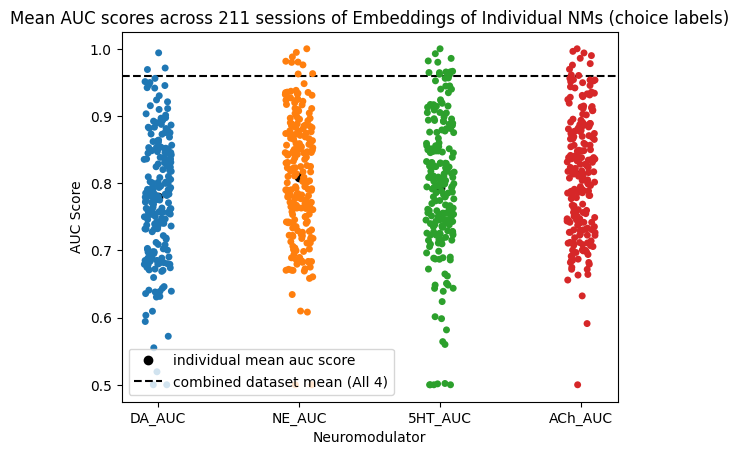

In [18]:
plotAUC_ind_nms(df_sessions_300_c, title='Mean AUC scores across 211 sessions of Embeddings of Individual NMs (choice labels)')

In [40]:
def plotR2_ind_nms(df, title='Mean R2 scores across 81 sessions of Embeddings of Individual NMs'):

    all_auc_mean = df.iloc[:,2].mean()
    ind_nms_mean_auc = np.array(df.iloc[:,[3, 4, 5, 6]].mean())

    b4_auc_mean = df.iloc[:,7].mean()
    af_auc_mean = df.iloc[:,8].mean()


    sns.stripplot(data=df.iloc[:,[3, 4, 5, 6]])
    plt.plot(ind_nms_mean_auc, 'ko', label='individual mean R2 score')
    plt.xlabel('Neuromodulator')
    plt.axhline(np.round(all_auc_mean,2), linestyle='--', c='k',label='combined dataset mean (All 4)')
    plt.ylabel('R2 Score')
    plt.title(title)
    plt.legend()
    plt.show()

In [15]:
df_sessions_310_rpe = pickle.load(open('/Users/brian.gitahi/Desktop/AIND/CEBRA/Git/CEBRA-Demo/session_stats(rpe)_310.pkl', "rb"))

In [65]:
df_sessions_300_c.iloc[50:100]

,subject_ID,ses_idx,all4_AUC,DA_AUC,NE_AUC,5HT_AUC,ACh_AUC,b4_AUC,af_AUC
50,632105,632105_2022-07-21,0.981126,0.909728,0.936799,0.913018,0.885084,0.966350,0.985224
51,632105,632105_2022-07-22,1.000000,0.969136,0.981481,1.000000,0.993827,1.000000,1.000000
52,632105,632105_2022-07-23,0.985100,0.951152,0.994624,0.985714,0.989862,0.990476,0.985714
53,632105,632105_2022-07-24,0.995169,0.835404,0.885783,0.902346,0.847826,0.992063,0.985852
54,632105,632105_2022-08-08,0.915877,0.609431,0.683571,0.746067,0.684924,0.797959,0.830609
55,632105,632105_2022-08-10,0.986082,0.749938,0.792636,0.847974,0.737298,0.872483,0.879643
56,632105,632105_2022-08-12,0.966888,0.782997,0.794877,0.829368,0.682061,0.894721,0.866609
57,632105,632105_2022-08-16,0.953048,0.771882,0.775290,0.755462,0.743208,0.816838,0.870950
58,632105,632105_2022-08-17,0.882743,0.737648,0.767093,0.698762,0.706994,0.790719,0.793798
59,632105,632105_2022-08-18,0.880073,0.670368,0.670419,0.648381,0.700340,0.715534,0.760407


In [70]:
type(df_sessions_300_c['subject_ID'].iloc[0])

str

In [93]:
df_sessions_300_c['subject_ID'].unique().shape

(16,)

In [107]:
np.exp2(7)

128.0

In [94]:
# small analysis to check if the elements are clustered or not
subject_positions = {}

for  subject in df_sessions_300_c['subject_ID'].unique():
    positions = df_sessions_300_c.index[df_sessions_300_c['subject_ID']==subject].tolist()
    subject_positions[subject] = positions

def is_contiguous(pos):
    return all(x == pos[i - 1] + 1 for i,x in enumerate(pos) if i >0)

clustered_subjects = {}
for subject, positions in subject_positions.items():
    clustered_subjects[subject] = is_contiguous(positions)

np.unique(clustered_subjects.values(), return_counts=True)


In [95]:
len(clustered_subjects.values())

In [112]:
df_sessions_300_c[(df_sessions_300_c['subject_ID']=='632107')]

,subject_ID,ses_idx,all4_AUC,DA_AUC,NE_AUC,5HT_AUC,ACh_AUC,b4_AUC,af_AUC
86,632107,632107_2022-08-05,0.979567,0.698023,0.810022,0.752511,0.81557,0.805736,0.833911


In [17]:
df_sessions_310_rpe['subject_ID'].unique().shape

(17,)

In [16]:
df_sessions_310_rpe.iloc[50:100]

,subject_ID,ses_idx,all4_R2,DA_R2,NE_R2,5HT_R2,ACh_R2,b4_R2,af_R2
50,632105,632105_2022-07-23,0.181603,0.290865,0.064363,0.000598,0.028624,0.004505,0.188662
51,632105,632105_2022-07-24,0.110074,0.072148,0.058791,0.038306,0.052524,0.013164,0.136344
52,632105,632105_2022-08-08,0.474970,0.405010,0.278015,0.058896,0.122390,0.011817,0.427612
53,632105,632105_2022-08-10,0.682999,0.642136,0.606088,0.605830,0.494657,0.189304,0.665153
54,632105,632105_2022-08-12,0.127862,0.151544,0.074505,0.097294,0.072352,0.039484,0.155998
55,632105,632105_2022-08-16,0.515061,0.565273,0.535388,0.267916,0.096512,0.112759,0.540659
56,632105,632105_2022-08-17,0.212587,0.171762,0.215394,0.164324,0.079637,0.052479,0.330348
57,632105,632105_2022-08-18,0.699120,0.668338,0.680857,0.557860,0.085288,0.079385,0.647891
58,632105,632105_2022-08-19,0.477849,0.481249,0.434538,0.408746,0.171765,0.212503,0.441096
59,632105,632105_2022-08-29,0.707791,0.700677,0.696813,0.625386,0.505481,0.174053,0.701825


In [125]:
np.unique(df_sessions_310_rpe.groupby('subject_ID').cumcount())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [126]:
df_sessions_310_rpe.groupby('subject_ID').cumcount()

0       0
1       1
2       2
3       3
4       4
       ..
200    14
201     0
202     1
203     2
204     3
Length: 205, dtype: int64

In [129]:
df_sessions_310_rpe['ses_idx_count'] = df_sessions_310_rpe.groupby('subject_ID').cumcount() + 1

In [130]:
df_sessions_310_rpe

,subject_ID,ses_idx,all4_R2,DA_R2,NE_R2,5HT_R2,ACh_R2,b4_R2,af_R2,ses_idx_count
0,631198,631198_2022-07-13,0.041141,0.002456,0.051674,0.128383,0.107969,0.021773,0.366032,1
1,631198,631198_2022-07-14,0.077229,0.006450,0.095478,0.050001,0.094595,0.012253,0.045045,2
2,631198,631198_2022-07-20,0.274617,0.014499,0.032934,0.076755,0.086326,0.031454,0.231885,3
3,631198,631198_2022-07-21,0.395268,0.020262,0.108022,0.004124,0.133486,0.020923,0.399283,4
4,631198,631198_2022-07-22,0.276387,0.008862,0.069646,0.031648,0.034464,0.094729,0.187402,5
...,...,...,...,...,...,...,...,...,...,...
200,641494,641494_2022-11-22,0.145972,0.103372,0.031809,0.004836,0.040695,0.030088,0.016338,15
201,641495,641495_2022-10-03,0.594862,0.489785,0.582260,0.150062,0.409977,0.043539,0.582175,1
202,641495,641495_2022-10-04,0.625998,0.581673,0.621228,0.017223,0.299999,0.035519,0.641202,2
203,641495,641495_2022-10-06,0.621449,0.584687,0.604862,0.019865,0.387050,0.060455,0.589160,3


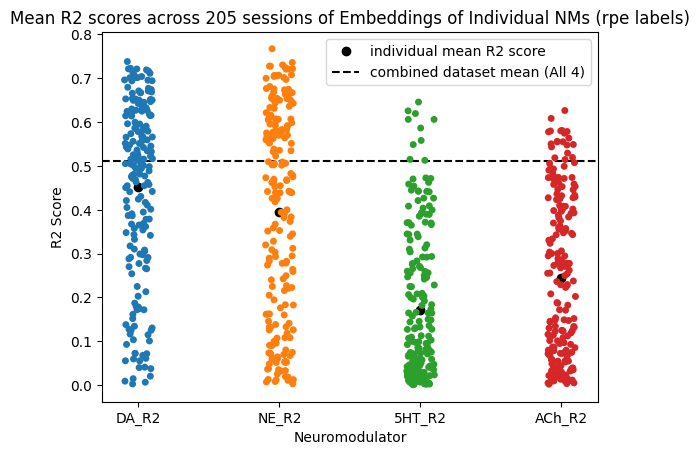

In [50]:
plotR2_ind_nms(df_sessions_310_rpe, title='Mean R2 scores across 205 sessions of Embeddings of Individual NMs (rpe labels)')

## Load the Data

Here we load data from the Fibre Photometry pipeline of 4 Neuromodulators (DA, 5HT, ACh, NE) recorded in the Nucleus Acumbens region. The main neural data will be in the form of dF_F traces of these 4 Neuromodulators (NMs). These will be stored in a 2D array, 'all_nms'.

In [2]:
pd.__version__

'2.0.0'

In [3]:
#pip install pandas==2.0.0

In [ ]:
items = ['a', 'b']

In [ ]:
for i, item in enumerate()

4

In [131]:
#
df_trials_ses = pickle.load(open('/Users/brian.gitahi/Desktop/AIND/CEBRA/Git/CEBRA-Demo/data/CO data/df.pkl', "rb"))

In [38]:
df_trials_ses['rpe'].describe()

count    6868.000000
mean        0.056188
std         0.520992
min        -0.899843
25%        -0.331301
50%        -0.069068
75%         0.554228
max         1.000000
Name: rpe, dtype: float64

In [60]:
df_trials_ses['rpe'].describe()

count    6868.000000
mean        0.056188
std         0.520992
min        -0.899843
25%        -0.331301
50%        -0.069068
75%         0.554228
max         1.000000
Name: rpe, dtype: float64

In [61]:
df_trials_ses.columns

Index(['bit_code', 'ses_idx', 'rpe', 'left_action_value', 'right_action_value',
       'licks L', 'licks R', 'Lick L (raw)', 'Lick R (raw)', 'trial', 'reward',
       'choice', 'go_cue_absolute_time', 'go_cue', 'choice_time',
       'reward_time', 'onset', 'NM', 'NM_name', 'region', 'last_value_NM',
       'overlap_index', 'NM_no_overlap', 'bins_mids', 'bins_mids_no_overlap'],
      dtype='object')

In [34]:
all_auc_mean

0.9915163619452869

In [5]:
df_trials_ses[['choice_time', 'reward_time']]

,choice_time,reward_time
0,92.321007,92.362000
1,101.023003,NaN
2,108.575996,NaN
3,113.322006,NaN
4,117.152000,NaN
...,...,...
1760,10949.992188,NaN
1761,10954.376953,10954.419922
1762,10960.488281,10960.533203
1763,10965.165039,NaN


In [6]:
# 68% of the values in the reward_time column are null
df_trials_ses['choice_time'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
1760    False
1761    False
1762    False
1763    False
1764    False
Name: choice_time, Length: 7060, dtype: bool

In [6]:
# download the dictionary containing the traces
traces = pickle.load(open('/Users/brian.gitahi/Desktop/AIND/CEBRA/Git/CEBRA-Demo/data/CO data/traces.pkl', "rb"))

In [21]:
len(traces.keys())

4

In [8]:
traces['DA NAc'].shape

(218572,)

In [9]:
# Combine the traces into one 2D array
all_nms = np.array([traces[trace] for trace in traces.keys()])
all_nms = np.transpose(all_nms)

In [10]:
# change it to an array of floats (previously it was an array of object datatype)
all_nms_new = all_nms.astype(np.float64)
all_nms_new.shape

(218572, 4)

In [11]:
# convert it to a tensor (this is probably not necessary but we want it to be as close to the inputs in the previous notebook)
all_nms_tensor = torch.from_numpy(all_nms_new)
all_nms_tensor.shape

torch.Size([218572, 4])

The neural data (4 NMs) is across 218,572 time-steps.

## Create the behavioural /auxiliary variables

These will be the labels we use with CEBRA-Behaviour mode.

In [12]:
# First, get the total number of trials in our data
n_trials = df_trials_ses['reward'].index.max() + 1
n_trials

# Then create a list to hold the individual trial labels
all_labels = []

# And then...at each trial,
for i in range(0,n_trials):

    # get the number of timesteps in the trial
    n_timesteps  = df_trials_ses['NM_no_overlap'].iloc[i].shape[0]

    # check if it actually made a choice - 0 if it didn't make a choice
    if np.isnan(df_trials_ses['choice_time'].iloc[i]):
         trial_label = 2*np.ones(n_timesteps)

    # make a boolean array indicating each of the timesteps as 1(rewarded)/2(unrewarded)
    elif df_trials_ses['reward'].iloc[i]:
        trial_label = np.ones(n_timesteps)

    elif df_trials_ses['reward'].iloc[i] == False:
        trial_label = np.zeros(n_timesteps)

    # append the boolean array to the list of trial labels
    all_labels.append(trial_label)

# Then concatenate the list of arrays containing the trial labels 
labels = np.concatenate(all_labels)

# Finally, compare the length of the label and the neural data
print('length of labels', labels.shape)
print('shape of neural data', all_nms.shape)



length of labels (218572,)
shape of neural data (218572, 4)


In [13]:
np.isnan(df_trials_ses['choice_time'].iloc[i])

False

In [14]:
np.unique(df_trials_ses['choice_time'], return_counts=True)

(array([   92.32100677,   101.02300262,   108.5759964 , ...,
        10965.16503906, 10968.58203125,            nan]),
 array([  4,   4,   4, ...,   4,   4, 192]))

In [15]:
df_trials_ses['choice_time']

0          92.321007
1         101.023003
2         108.575996
3         113.322006
4         117.152000
            ...     
1760    10949.992188
1761    10954.376953
1762    10960.488281
1763    10965.165039
1764    10968.582031
Name: choice_time, Length: 7060, dtype: float64

In [16]:
df_trials_ses.columns

Index(['bit_code', 'ses_idx', 'rpe', 'left_action_value', 'right_action_value',
       'licks L', 'licks R', 'Lick L (raw)', 'Lick R (raw)', 'trial', 'reward',
       'choice', 'go_cue_absolute_time', 'go_cue', 'choice_time',
       'reward_time', 'onset', 'NM', 'NM_name', 'region', 'last_value_NM',
       'overlap_index', 'NM_no_overlap', 'bins_mids', 'bins_mids_no_overlap'],
      dtype='object')

In [17]:
type(df_trials_ses['choice'].iloc[0])


str

This also confirms that the length (number of timesteps) of the traces in the .npy file is the same as the total session length if we combine all the timesteps in the trials in the dataframe.

In [18]:
labels

array([1., 1., 1., ..., 0., 0., 0.])

In [19]:
# check for random timesteps and see if it's actually the correct reward labels used
np.unique(labels, return_counts=True)

(array([0., 1., 2.]), array([128781,  80450,   9341]))

Here, the example used is the second trial in the session which was unrewarded. (The first trial is 196 timesteps and the second trial is 151 timesteps). You can verify this using **'df_trials_ses['NM_no_overlap'].iloc[0].shape[0]'** for the first trial and **'df_trials_ses['NM_no_overlap'].iloc[1].shape[0]'** for the second trial.

Once we are satisfied with these labels, we proceed to build the CEBRA model.

## Build and train the CEBRA models

In [20]:
# set the maximum number of iterations for training the model
max_iterations = 2000

In [21]:
# build a CEBRA-Time and CEBRA-Behaviour model
cebra_time_model = CEBRA(model_architecture='offset10-model-mse',
                        batch_size=512,
                        learning_rate=3e-4,
                        temperature=1,
                        output_dimension=3,
                        max_iterations=max_iterations,
                        distance='euclidean',
                        conditional='time',
                        device='cuda_if_available',
                        verbose=True,
                        time_offsets=10)

In [22]:
cebra_behaviour_model = CEBRA(model_architecture='offset10-model-mse',
                        batch_size=512,
                        learning_rate=3e-4,
                        temperature=1,
                        output_dimension=3,
                        max_iterations=max_iterations,
                        distance='euclidean',
                        conditional='time_delta',
                        device='cuda_if_available',
                        verbose=True,
                        time_offsets=10)

Train the two models

In [23]:
# train the time model (no labels here)
cebra_time_model.fit(all_nms_tensor)

pos:  1.2998 neg:  2.5214 total:  3.8213 temperature:  1.0000: 100%|██████████| 2000/2000 [00:50<00:00, 39.75it/s]


CEBRA(batch_size=512, conditional='time', distance='euclidean',
      max_iterations=2000, model_architecture='offset10-model-mse',
      output_dimension=3, temperature=1, time_offsets=10, verbose=True)

In [24]:
# train the behaviour model (use the labels here)
cebra_behaviour_model.fit(all_nms_tensor,labels)

pos:  0.7760 neg:  5.0995 total:  5.8754 temperature:  1.0000: 100%|██████████| 2000/2000 [01:08<00:00, 29.08it/s]


CEBRA(batch_size=512, conditional='time_delta', distance='euclidean',
      max_iterations=2000, model_architecture='offset10-model-mse',
      output_dimension=3, temperature=1, time_offsets=10, verbose=True)

In [25]:
type(labels)

numpy.ndarray

## Compute Embeddings
Then compute the embeddings from the two trained models

In [26]:
time_embedding = cebra_time_model.transform(all_nms_tensor)

In [27]:
behaviour_embedding = cebra_behaviour_model.transform(all_nms_tensor)

In [28]:
# divide the labels into rewarded and unrewarded
rewarded_ = labels==1
unrewarded_ = labels==0
no_choice = labels==2

rewarded_ = rewarded_.flatten()
unrewarded_ = unrewarded_.flatten()
no_choice = no_choice.flatten()

In [29]:
# sanity check - confirm that there's only two possibilities and that they add up to the total # of timesteps
print('Unique values (and their corresponding counts in the labels:',np.unique(unrewarded_, return_counts=True))

print('Embedding (time) shape:',time_embedding.shape)
print('Embedding (behaviour) shape:',behaviour_embedding.shape)

print(np.sum(time_embedding.shape[0] - np.sum(np.unique(unrewarded_, return_counts=True)[1])))

Unique values (and their corresponding counts in the labels: (array([False,  True]), array([ 89791, 128781]))
Embedding (time) shape: (218572, 3)
Embedding (behaviour) shape: (218572, 3)
0


In [30]:
np.sum(time_embedding- behaviour_embedding)

909715.9

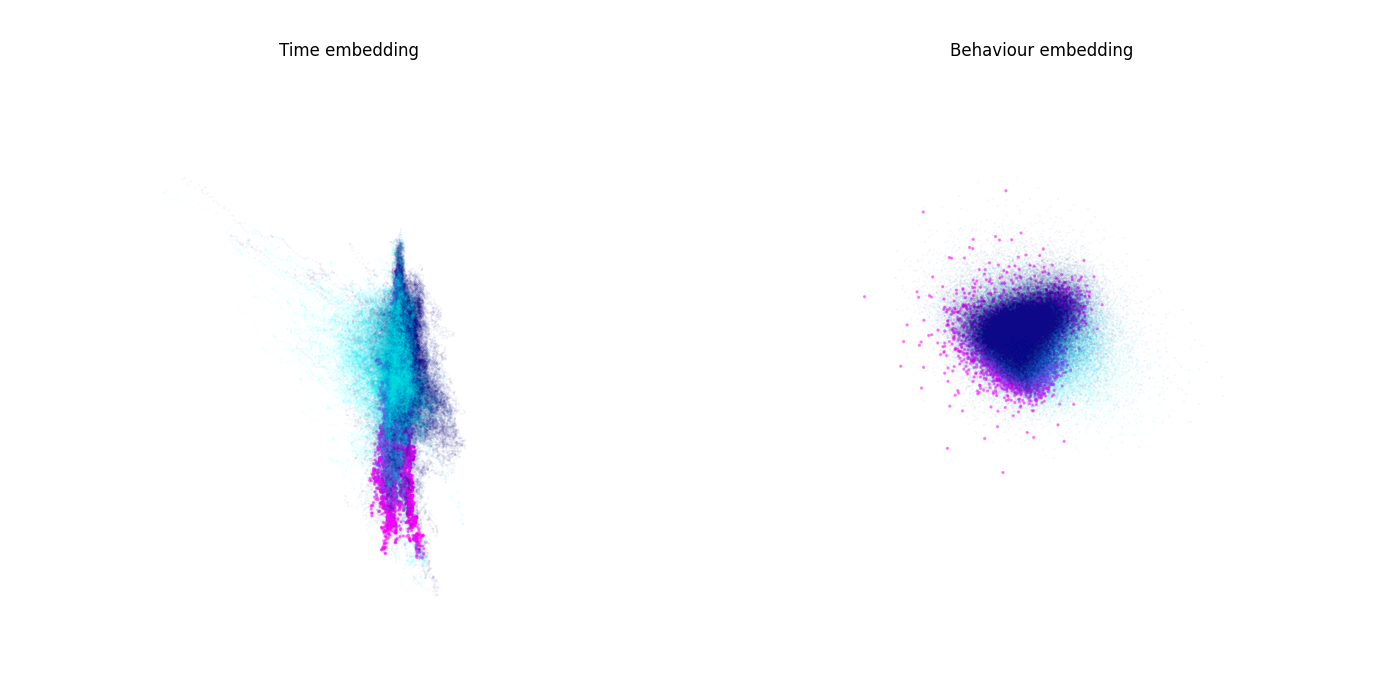

In [31]:
# create a figure and make the plots
fig1 = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(1, 2, figure=fig1)


ax1 = fig1.add_subplot(gs[0,0], projection='3d')
ax2 = fig1.add_subplot(gs[0,1], projection='3d')
ax1.axis('off')
ax2.axis('off')


# colour maps
colours = ['cool', 'plasma', 'spring']

# plot the time embedding 
cebra.plot_embedding(embedding=time_embedding[rewarded_,:], embedding_labels=labels[rewarded_],ax=ax1, markersize=0.002, title='Time embedding', cmap=colours[0])
cebra.plot_embedding(embedding=time_embedding[unrewarded_,:], embedding_labels=labels[unrewarded_],ax=ax1, markersize=0.002, title='Time embedding', cmap=colours[1])
cebra.plot_embedding(embedding=time_embedding[no_choice,:], embedding_labels=labels[no_choice],ax=ax1, markersize=2, title='Time embedding', cmap=colours[2])


# plot the behaviour embedding 
cebra.plot_embedding(embedding=behaviour_embedding[rewarded_,:], embedding_labels=labels[rewarded_],ax=ax2, markersize=0.002, title='Behaviour embedding', cmap=colours[0],)
cebra.plot_embedding(embedding=behaviour_embedding[unrewarded_,:], embedding_labels=labels[unrewarded_],ax=ax2,markersize=0.002, title='Behaviour embedding',  cmap=colours[1])
cebra.plot_embedding(embedding=behaviour_embedding[no_choice,:], embedding_labels=labels[no_choice],ax=ax2, markersize=2, title='Behaviour embedding', cmap=colours[2], zorder=50)

gs.tight_layout(figure=fig1)


<Axes3D: title={'center': 'CEBRA-Behaviour embedding'}>

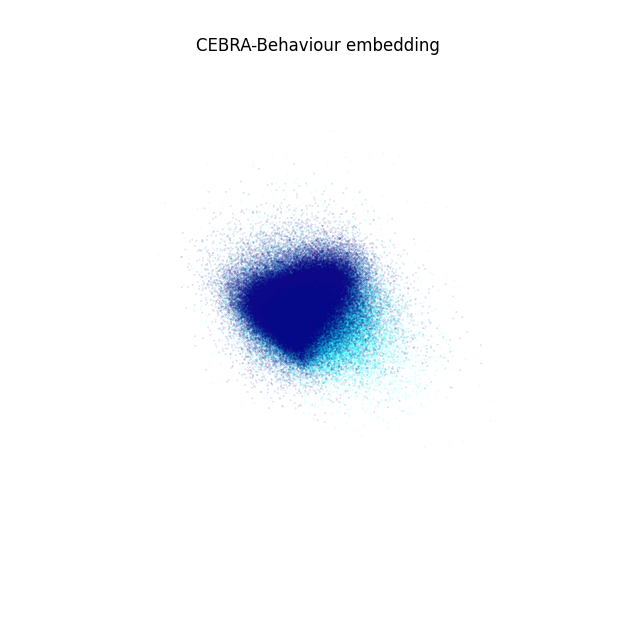

In [32]:
fig_ = plt.figure(figsize=(16,8))

ax0 = fig_.add_subplot(projection='3d')
ax0.axis('off')

# colour maps
colours = ['cool', 'plasma']

# plot the time embedding 
cebra.plot_embedding(embedding=behaviour_embedding[rewarded_,:], embedding_labels=labels[rewarded_],ax=ax0, markersize=0.02, title='CEBRA-Behaviour embedding', cmap=colours[0])
cebra.plot_embedding(embedding=behaviour_embedding[unrewarded_,:], embedding_labels=labels[unrewarded_],ax=ax0, markersize=0.02, title='CEBRA-Behaviour embedding', cmap=colours[1])


If this is correct, there should be a clear clustering of the rewarded (cool/light blue) vs the unrewarded (viridis/purple) trials.

## Verify the result

So it looks like there's two distinct clusters. But let's verify that.

1. View from different angles
2. Use both cosine distance and euclidean distance
3. Use 2D and 3D embeddings

In [33]:
def view_embedding(embed1, embed2, label, label_class, titles, s=[0.0001, 0.0001,1], n_angles=5):

    fig1=plt.figure(figsize=(8,4*n_angles))
    gs = gridspec.GridSpec(n_angles, 2, figure=fig1)

    c = ['cool','plasma','spring','pink','winter']

    for i, ii in enumerate(range(60,360,int(300/n_angles))):

        # create the axes
        ax1 = fig1.add_subplot(gs[1*i,0], projection='3d')
        ax1.view_init(elev=10., azim=ii) 

        ax2 = fig1.add_subplot(gs[1*i,1], projection='3d')
        ax2.view_init(elev=10., azim=ii)

        # loop over the number of labels
        for j,value in enumerate(label_class):
            
            # plot time embedding
            cebra.plot_embedding(embedding=embed1[value,:], embedding_labels=label[value], ax=ax1, markersize=s[j],title=titles[0],cmap=c[j])

            # plot behaviour embedding
            cebra.plot_embedding(embedding=embed2[value,:], embedding_labels=label[value], ax=ax2, markersize=s[j],title=titles[1],cmap=c[j])

            plt.tight_layout()

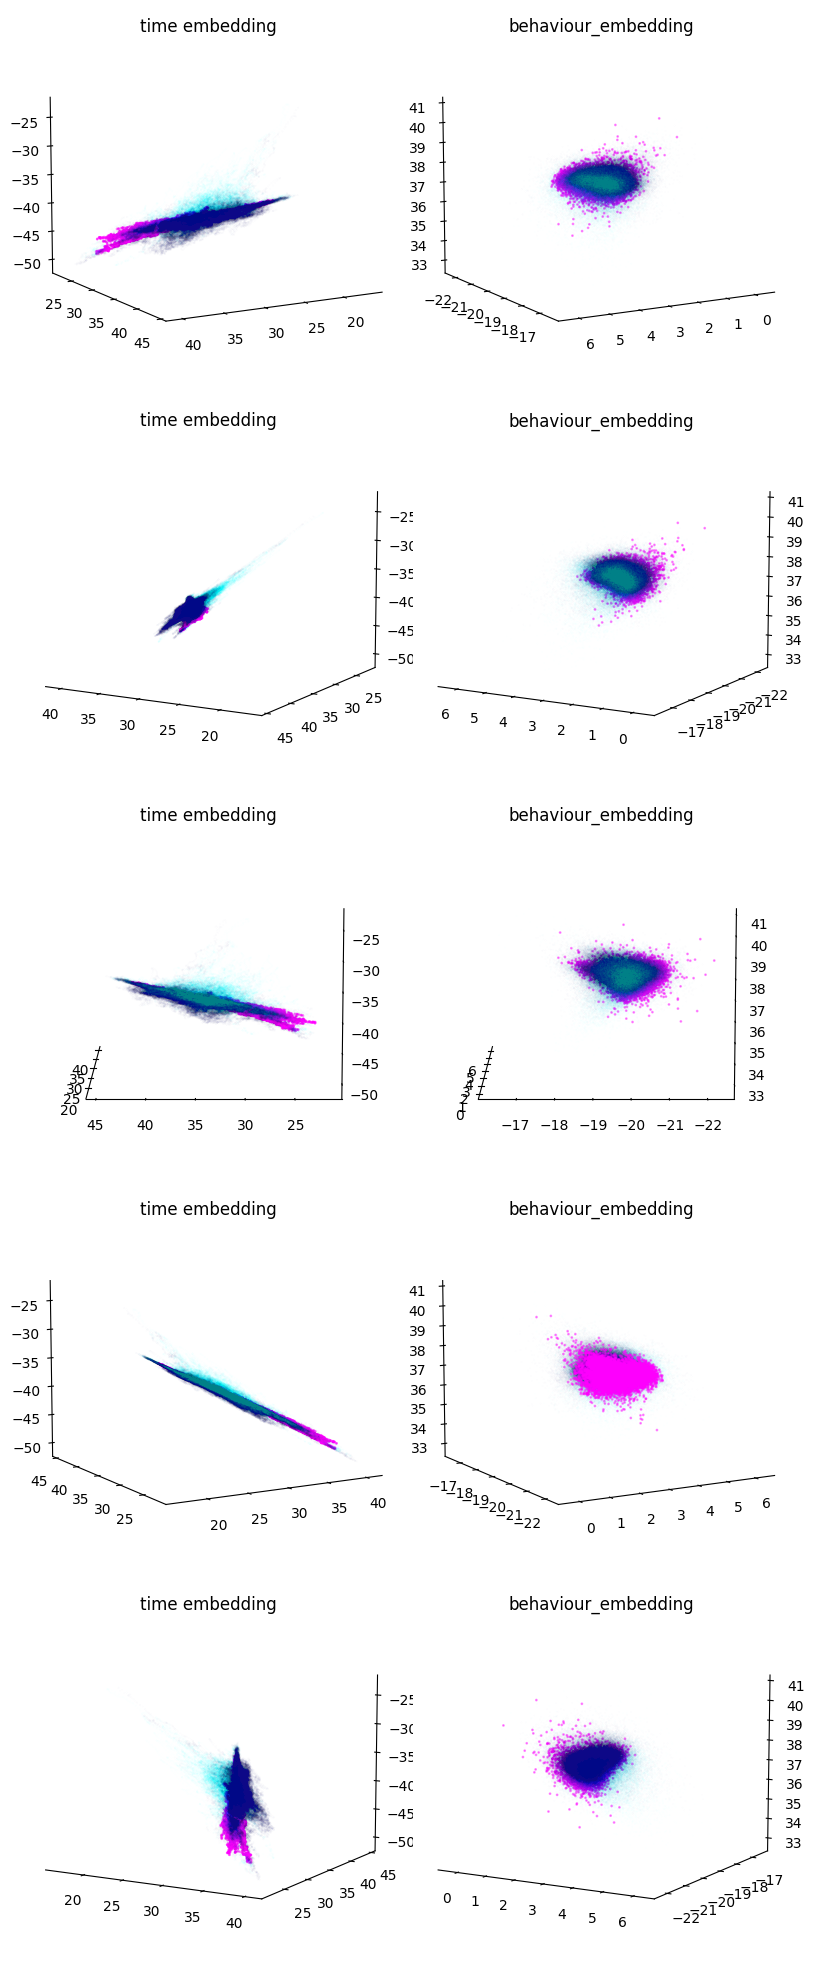

In [34]:
view_embedding(time_embedding, behaviour_embedding, label=labels,label_class= [rewarded_,unrewarded_, no_choice], titles=['time embedding','behaviour_embedding'])

1. At different angles we see they're actually distinct parts of the embedding.
2. Also, the euclidean embeddings make this more visible as compared to the cosine distance-based embeddings that constrain the dynamics to the surface of the sphere in 3D.

Now let's look at how it looks in 2D

### 2D Embeddings

In [35]:
# CEBRA Time
time_model_2d, time_embedding_2d = utils.base_embed(all_nms_tensor, dimension=2)

pos:  1.0472 neg:  2.6889 total:  3.7361 temperature:  1.0000: 100%|██████████| 2000/2000 [00:51<00:00, 38.57it/s]


In [36]:
# CEBRA Behaviour
behaviour_model_2d, behaviour_embedding_2d = utils.base_embed(all_nms_tensor,labels, dimension=2)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [37]:
# sanity check - confirm that there's only two possibilities and that they add up to the total # of timesteps
print('Unique values (and their corresponding counts in the labels:',np.unique(unrewarded_, return_counts=True))

print('Embedding (time) shape:',time_embedding_2d.shape)
print('Embedding (behaviour) shape:',behaviour_embedding_2d.shape)

print(np.sum(time_embedding_2d.shape[0] - np.sum(np.unique(unrewarded_, return_counts=True)[1])))

Unique values (and their corresponding counts in the labels: (array([False,  True]), array([ 89791, 128781]))
Embedding (time) shape: (218572, 2)


NameError: name 'behaviour_embedding_2d' is not defined

<Axes: title={'center': 'Behaviour embedding'}>

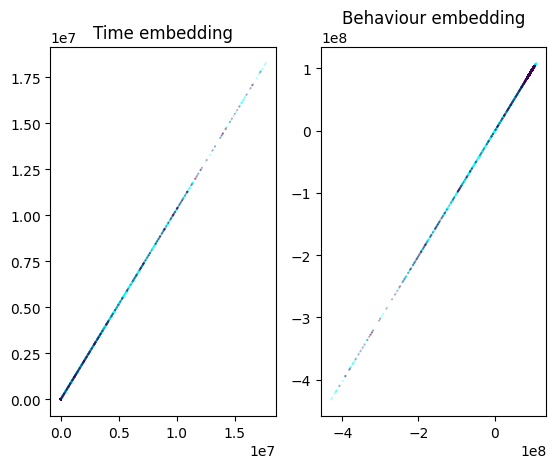

In [ ]:
# create a figure and make the plots
fig1 = plt.figure()
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

# plot the time embedding 
cebra.plot_embedding(embedding=time_embedding_2d[rewarded_,:], embedding_labels=labels[rewarded_],ax=ax1, markersize=0.2, title='Time embedding', cmap='cool')
cebra.plot_embedding(embedding=time_embedding_2d[unrewarded_,:], embedding_labels=labels[unrewarded_],ax=ax1, markersize=0.2, title='Time embedding', cmap='viridis')

# plot the behaviour embedding 
cebra.plot_embedding(embedding=behaviour_embedding_2d[rewarded_,:], embedding_labels=labels[rewarded_],ax=ax2, markersize=0.2, title='Behaviour embedding', cmap='cool')
cebra.plot_embedding(embedding=behaviour_embedding_2d[unrewarded_,:], embedding_labels=labels[unrewarded_],ax=ax2,markersize=0.2, title='Behaviour embedding', cmap='viridis')

3. So it looks like the distinction is not very visible in 2D...not sure this makes sense, but my intuition is that there's just not enough dimensions to describe what's different?

## Data around choice time -- #3

Here, we'll take the neural data 0.5 seconds before and after the choice in each trial. We will still use the reward labels and hopefully there's more correlation between this specific neural data and the labels.

In [10]:
n_trials

NameError: name 'n_trials' is not defined

In [39]:
trace_times = np.load('/Users/brian.gitahi/Desktop/AIND/CEBRA/Git/CEBRA-Demo/data/CO data/Trace times.npy', allow_pickle=True)

In [40]:
trace_times.shape

(218572,)

In [41]:
trace_times

array([91.05000152587891, 91.1000015258789, 91.1500015258789, ...,
       10973.62519531241, 10973.67519531241, 10973.725195312409],
      dtype=object)

In [11]:
choice_times = df_trials_ses['choice_time'][0:1765].to_numpy()

In [13]:
np.sum(np.unique(np.isnan(choice_times),return_counts=True)[1])

1765

In [43]:
choice_times.shape

(1765,)

In [44]:
print("trace time shape",trace_times.shape)
print("all nms", all_nms.shape)

trace time shape (218572,)
all nms (218572, 4)


48 trials where it didn't make a choice

In [45]:
# MAKE NM data of the 1s window around the choice

window_size = 20

# list to hold all the 1s windows
all_nms_window = []
all_labels_window = []

# new trial label
trial_labels = []

# loop over all trials
for i in range(0,n_trials):

    # skip trials where the animal didn't make a choice (null choice time)
    if np.isnan(choice_times[i]):
        continue

    # find the index of the closest time to the choice time in the trace_times array 
    idx = np.abs(trace_times-choice_times[i]).argmin()

    # take the previous 10 and the next 10 values of the NM data at these indices - 1s window
    all_nms_window.append(all_nms[idx-10:idx+10])

    # label the timepoints as rewarded or unrewarded
    if df_trials_ses['reward'].iloc[i]:
        window_label = np.ones(window_size).astype(np.bool_)

        # new trial label
        trial_labels.append(1)

    elif df_trials_ses['reward'].iloc[i]==False:
        window_label = np.zeros(window_size).astype(np.bool_) 

        # new trial label
        trial_labels.append(0)

    # append them to the list of labels
    all_labels_window.append(window_label)


# concatenate the lists of the 1s windows to single arrays
all_nms_1s = np.concatenate(all_nms_window)
labels_window = np.concatenate(all_labels_window)



In [55]:
n_trials

1765

In [46]:
trial_labels = np.array(trial_labels)

In [47]:
type(trial_labels)

numpy.ndarray

In [48]:
a = np.array([0,1,0,1,0,1])
a.astype(np.bool_)

array([False,  True, False,  True, False,  True])

In [49]:
df_trials_ses['choice_time'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
1760    False
1761    False
1762    False
1763    False
1764    False
Name: choice_time, Length: 7060, dtype: bool

In [54]:
all_nms_window.shape

AttributeError: 'list' object has no attribute 'shape'

In [51]:
z_ = np.stack(all_nms_window)

In [52]:
np.array(all_nms_window).shape

(1717, 20, 4)

In [53]:
z_w = z_.reshape((1717,-1))

In [ ]:
print("labels length",labels_window.shape)
print("neural data (window) shape",all_nms_1s.shape)

labels length (34340,)
neural data (window) shape (34340, 4)


In [ ]:
all_nms_1s = torch.from_numpy(all_nms_1s.astype(np.float64))
all_nms_1s.shape

torch.Size([34340, 4])

In [ ]:
# build a CEBRA-Time and CEBRA-Behaviour model
cebra_time_model_w = CEBRA(model_architecture='offset10-model-mse',
                        batch_size=512,
                        learning_rate=3e-4,
                        temperature=1,
                        output_dimension=3,
                        max_iterations=max_iterations,
                        distance='euclidean',
                        conditional='time',
                        device='cuda_if_available',
                        verbose=True,
                        time_offsets=10)

cebra_behaviour_model_w = CEBRA(model_architecture='offset10-model-mse',
                        batch_size=512,
                        learning_rate=3e-4,
                        temperature=1,
                        output_dimension=3,
                        max_iterations=max_iterations,
                        distance='euclidean',
                        conditional='time_delta',
                        device='cuda_if_available',
                        verbose=True,
                        time_offsets=10)

In [ ]:
# train time model
cebra_time_model_w.fit(all_nms_1s)

pos:  0.9377 neg:  3.5526 total:  4.4903 temperature:  1.0000: 100%|██████████| 2000/2000 [00:51<00:00, 39.05it/s]


CEBRA(batch_size=512, conditional='time', distance='euclidean',
      max_iterations=2000, model_architecture='offset10-model-mse',
      output_dimension=3, temperature=1, time_offsets=10, verbose=True)

In [ ]:
# train behaviour model
cebra_behaviour_model_w.fit(all_nms_1s, labels_window)

pos:  0.8540 neg:  3.4935 total:  4.3476 temperature:  1.0000: 100%|██████████| 2000/2000 [00:51<00:00, 38.58it/s]


CEBRA(batch_size=512, conditional='time_delta', distance='euclidean',
      max_iterations=2000, model_architecture='offset10-model-mse',
      output_dimension=3, temperature=1, time_offsets=10, verbose=True)

In [ ]:
# compute the time embedding
time_embedding_w = cebra_time_model_w.transform(all_nms_1s)

In [ ]:
# compute the behaviour embedding
behaviour_embedding_w = cebra_behaviour_model_w.transform(all_nms_1s)

In [ ]:
# divide the labels into rewarded and unrewarded
rewarded_w = labels_window==True
unrewarded_w = labels_window==False

rewarded_w = rewarded_w.flatten()
unrewarded_w = unrewarded_w.flatten()

In [ ]:
int(rewarded_w)

TypeError: only length-1 arrays can be converted to Python scalars

In [ ]:
np.sum(rewarded_w.astype())

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

Make this part a callable function with embeddings as input

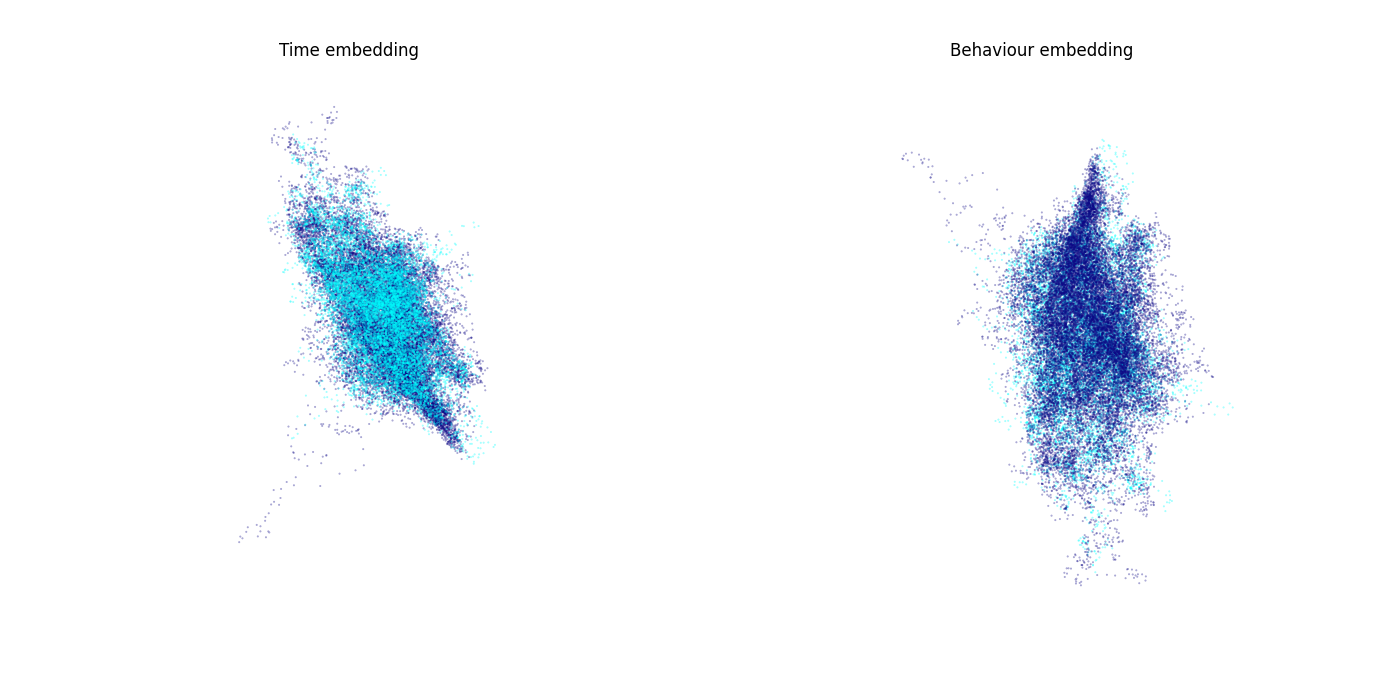

In [ ]:
# create a figure and make the plots
fig3 = plt.figure(figsize=(14,8))
gs_w = gridspec.GridSpec(1, 2, figure=fig3)


ax1_ = fig3.add_subplot(gs_w[0,0], projection='3d')
ax2_ = fig3.add_subplot(gs_w[0,1], projection='3d')
ax1_.axis('off')
ax2_.axis('off')


# colour maps
colours = ['cool', 'plasma', 'spring']

# plot the time embedding 
cebra.plot_embedding(embedding=time_embedding_w[rewarded_w,:], embedding_labels=labels_window[rewarded_w],ax=ax1_, markersize=0.2, title='Time embedding', cmap=colours[0])
cebra.plot_embedding(embedding=time_embedding_w[unrewarded_w,:], embedding_labels=labels_window[unrewarded_w],ax=ax1_, markersize=0.2, title='Time embedding', cmap=colours[1])




# plot the behaviour embedding 
cebra.plot_embedding(embedding=behaviour_embedding_w[rewarded_w,:], embedding_labels=labels_window[rewarded_w],ax=ax2_, markersize=0.2, title='Behaviour embedding', cmap=colours[0],)
cebra.plot_embedding(embedding=behaviour_embedding_w[unrewarded_w,:], embedding_labels=labels_window[unrewarded_w],ax=ax2_,markersize=0.2, title='Behaviour embedding',  cmap=colours[1])
gs_w.tight_layout(figure=fig3)

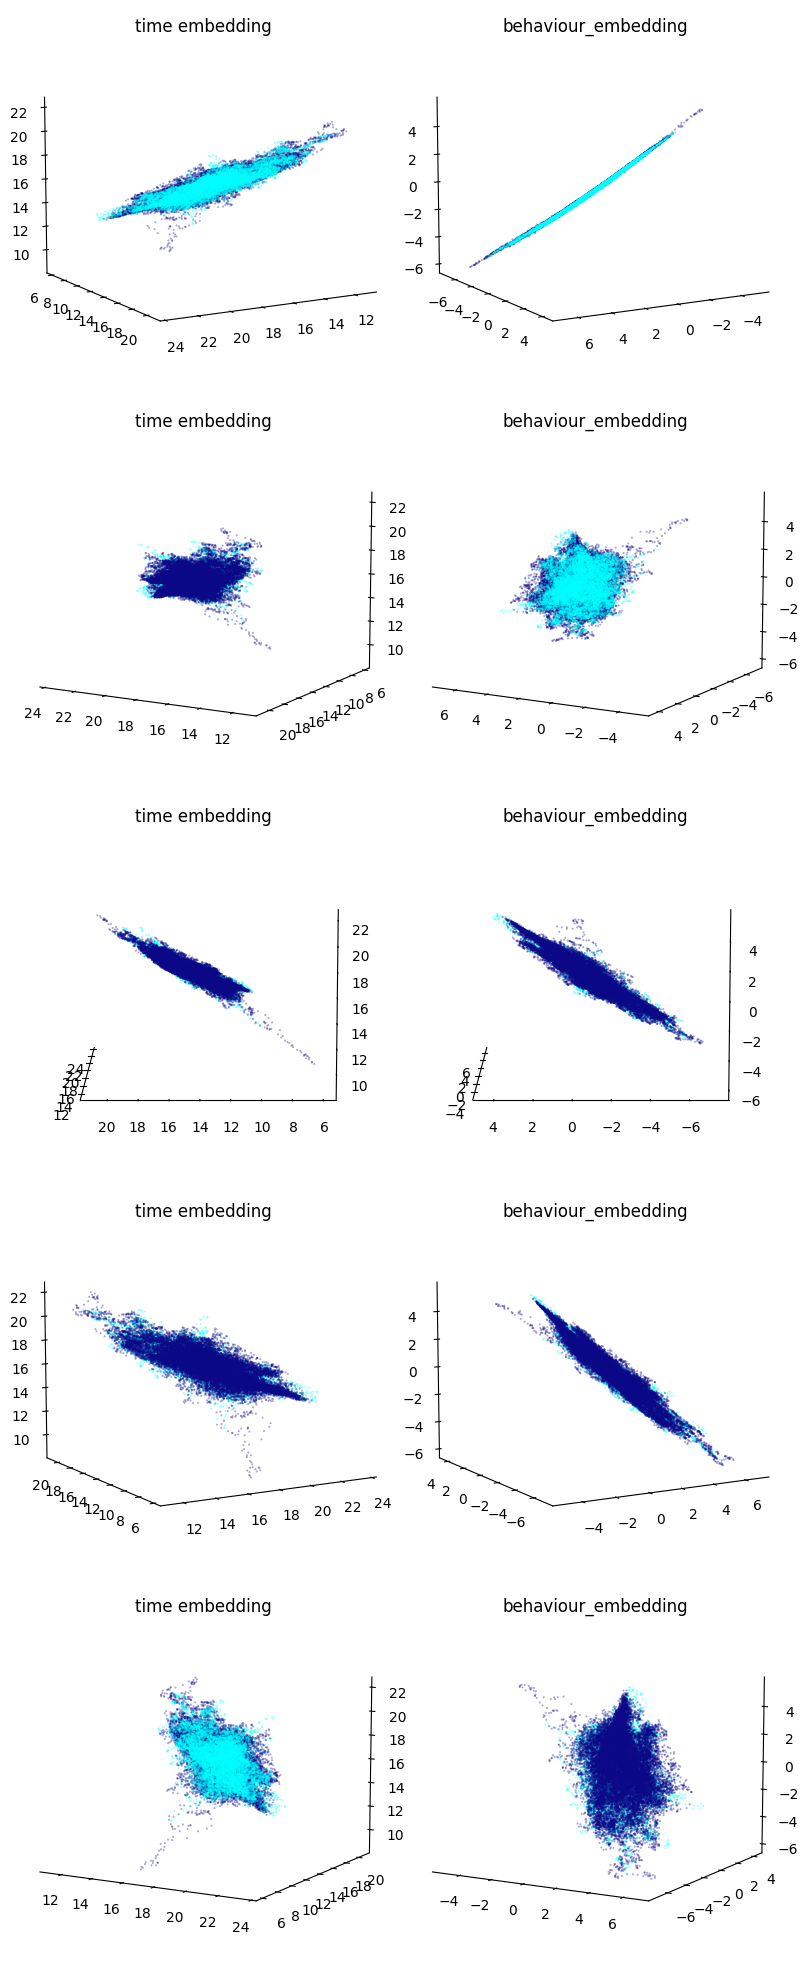

In [ ]:
utils.view_embedding(time_embedding_w, behaviour_embedding_w, label=labels_window, s =0.2,label_class=[rewarded_w, unrewarded_w], titles=['time embedding','behaviour_embedding'], n_angles=5)

## 80 D input

In [ ]:
all_nms_1s.shape

torch.Size([34340, 4])

In [ ]:
# get the neural data to the desired shape
z_.shape

(1717, 20, 4)

In [ ]:
z_w.shape

(1717, 80)

In [ ]:
all_nms_80 = torch.from_numpy(z_w.astype(np.float64))
all_nms_80.shape

torch.Size([1717, 80])

In [ ]:
trial_l

In [ ]:
# reshape behavioural labels if necessary
trial_labels.shape

(1717,)

In [ ]:
# run CEBRA and get embeddings

# build a CEBRA-Time and CEBRA-Behaviour model
cebra_time_model_80 = CEBRA(model_architecture='offset10-model-mse',
                        batch_size=512,
                        learning_rate=3e-4,
                        temperature=1,
                        output_dimension=3,
                        max_iterations=max_iterations,
                        distance='euclidean',
                        conditional='time',
                        device='cuda_if_available',
                        verbose=True,
                        time_offsets=10)




In [ ]:
cebra_behaviour_model_80 = CEBRA(model_architecture='offset10-model-mse',
                        batch_size=512,
                        learning_rate=3e-4,
                        temperature=1,
                        output_dimension=3,
                        max_iterations=max_iterations,
                        distance='euclidean',
                        conditional='time_delta',
                        device='cuda_if_available',
                        verbose=True,
                        time_offsets=10)

In [ ]:
# train the time model (no labels here)
cebra_time_model_80.fit(all_nms_80)

pos:  0.8869 neg:  2.8806 total:  3.7675 temperature:  1.0000: 100%|██████████| 2000/2000 [00:53<00:00, 37.66it/s]


CEBRA(batch_size=512, conditional='time', distance='euclidean',
      max_iterations=2000, model_architecture='offset10-model-mse',
      output_dimension=3, temperature=1, time_offsets=10, verbose=True)

In [ ]:
# train the behaviour model (use the labels here)
cebra_behaviour_model_80.fit(all_nms_80, trial_labels)

pos:  0.3291 neg:  5.4545 total:  5.7836 temperature:  1.0000: 100%|██████████| 2000/2000 [00:54<00:00, 36.38it/s]


CEBRA(batch_size=512, conditional='time_delta', distance='euclidean',
      max_iterations=2000, model_architecture='offset10-model-mse',
      output_dimension=3, temperature=1, time_offsets=10, verbose=True)

In [ ]:
# compute time embedding
time_embedding_80 = cebra_time_model_80.transform(all_nms_80)

In [ ]:
# compute behaviour embedding
behaviour_embedding_80 = cebra_behaviour_model_80.transform(all_nms_80)

In [ ]:
time_embedding_80.shape

(1717, 3)

In [ ]:
# divide the labels into rewarded and unrewarded
rewarded_80 = trial_labels==1
unrewarded_80 = trial_labels==0

rewarded_80 = rewarded_80.flatten()
unrewarded_80 = unrewarded_80.flatten()

In [ ]:
rewarded_80.shape

(1717,)

/var/folders/zy/yd8f_r21629f1sr6zfh12jv40000gp/T/ipykernel_15111/3748555494.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  gs.tight_layout(figure=fig8)


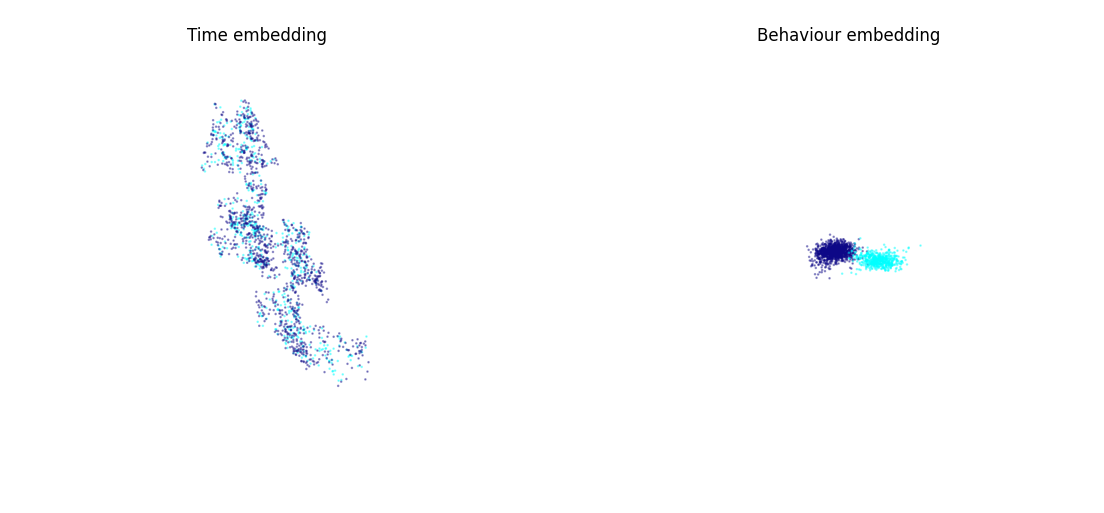

In [ ]:
# create a figure and make the plots
fig8 = plt.figure(figsize=(14,8))
gs8 = gridspec.GridSpec(1, 2, figure=fig8)


ax81 = fig8.add_subplot(gs8[0,0], projection='3d')
ax82 = fig8.add_subplot(gs8[0,1], projection='3d')
ax81.axis('off')
ax82.axis('off')


# colour maps
colours = ['cool', 'plasma', 'spring']

# plot the time embedding 
cebra.plot_embedding(embedding=time_embedding_80[rewarded_80,:], embedding_labels=trial_labels[rewarded_80],ax=ax81, markersize=0.7, title='Time embedding', cmap=colours[0])
cebra.plot_embedding(embedding=time_embedding_80[unrewarded_80,:], embedding_labels=trial_labels[unrewarded_80],ax=ax81, markersize=0.7, title='Time embedding', cmap=colours[1])


# plot the behaviour embedding 
cebra.plot_embedding(embedding=behaviour_embedding_80[rewarded_80,:], embedding_labels=trial_labels[rewarded_80],ax=ax82, markersize=0.7, title='Behaviour embedding', cmap=colours[0],)
cebra.plot_embedding(embedding=behaviour_embedding_80[unrewarded_80,:], embedding_labels=trial_labels[unrewarded_80],ax=ax82,markersize=0.7, title='Behaviour embedding',  cmap=colours[1])

gs.tight_layout(figure=fig8)

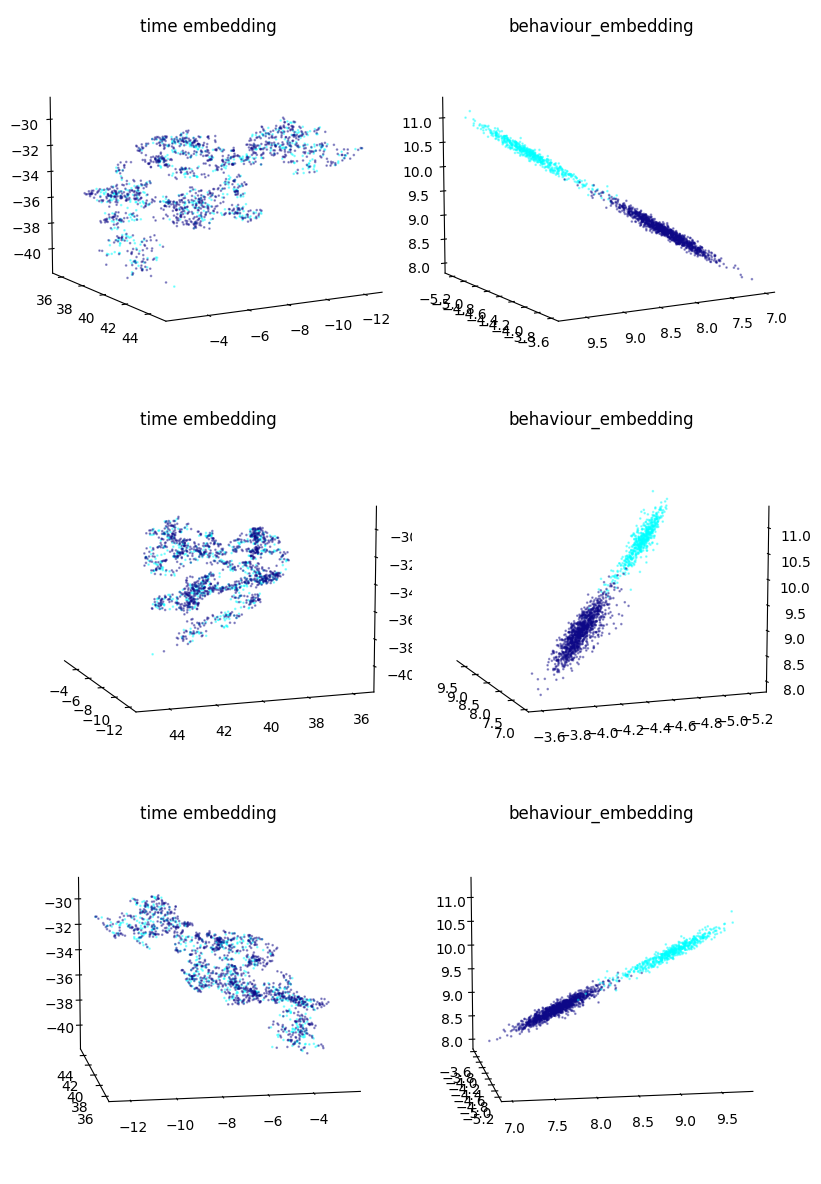

In [ ]:
utils.view_embedding(time_embedding_80, behaviour_embedding_80, s=0.8, label=trial_labels, label_class =[rewarded_80, unrewarded_80], titles=['time embedding','behaviour_embedding'])